In [ ]:
# -*- coding: utf-8 -*-
# Jianying LIU

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import font_manager as fm
import numpy as np
import json
import glob

In [24]:
# vrais cas
vraicsv = "mwe_vrai_cas93.csv"
vrai_df = pd.read_csv(vraicsv, encoding="utf8")
vrai_df

,sous-corpus,Expression,forme canonique,Q1avg,Q2avg,Q3avg,Moyenne 1-2 (3),Q4avg,Moyenne,Degré,Q1std,Q2std,Q4std,Q1cv,Q2cv,Q4cv,Q4degre
0,ESLO_ANCOR,prendre position,prendre position,1.850,3.75,#DIV/0!,2.8000,2.925,2.86250,moyen,0.35,0.83,0.553963,0.189189,0.221108,0.189389,moyen
1,ESLO_ANCOR,avoir rôle,avoir rôle,1.875,4.50,#DIV/0!,3.1875,3.950,3.56875,moyen,0.75,0.87,0.782624,0.399778,0.192450,0.198133,moyen
2,ESLO_ANCOR,avoir idée,avoir idée,2.225,5.00,#DIV/0!,3.6125,3.950,3.78125,moyen,1.28,0.00,0.782624,0.576767,0.000000,0.198133,moyen
3,ESLO_ANCOR,produire résultat,produire résultat,3.075,4.50,#DIV/0!,3.7875,4.125,3.95625,moyen,1.04,0.87,0.762807,0.336687,0.192450,0.184923,fort
4,ESLO_ANCOR,exercer contrôle,exercer contrôle,2.900,4.50,#DIV/0!,3.7000,3.975,3.83750,moyen,0.99,0.87,0.872855,0.341362,0.192450,0.219586,moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,ESLO_ANCOR,avoir perception,avoir perception,2.050,5.00,#DIV/0!,3.5250,3.475,3.50000,moyen,1.01,0.00,0.617960,0.490844,0.000000,0.177830,moyen
89,ESLO_ANCOR,cours donner,donner cours,2.550,4.50,#DIV/0!,3.5250,3.950,3.73750,moyen,0.78,0.87,0.782624,0.306911,0.192450,0.198133,moyen
90,ESLO_ANCOR,poser question,poser question,2.200,4.75,#DIV/0!,3.4750,3.600,3.53750,moyen,0.86,0.43,0.494975,0.389692,0.091161,0.137493,moyen
91,ESLO_ANCOR,faire course,faire course,2.375,4.75,#DIV/0!,3.5625,3.375,3.46875,moyen,0.76,0.43,0.311247,0.321182,0.091161,0.092221,moyen


In [25]:
degre_m_count = vrai_df["Degré"].value_counts()
degre_q4_count = vrai_df["Q4degre"].value_counts()
print(degre_m_count)
print(degre_q4_count)

moyen    88
fort      5
Name: Degré, dtype: int64
moyen     79
fort      13
faible     1
Name: Q4degre, dtype: int64


In [27]:
# faux cas
fauxcsv = "mwe_non_vrai_cas26.csv"
faux_df = pd.read_csv(fauxcsv, encoding="utf8")
degre_m_count = faux_df["Degré"].value_counts()
degre_q4_count = faux_df["Q4degre"].value_counts()
print(degre_m_count)
print(degre_q4_count)

moyen     20
faible     3
fort       3
Name: Degré, dtype: int64
moyen     15
fort       6
faible     5
Name: Q4degre, dtype: int64


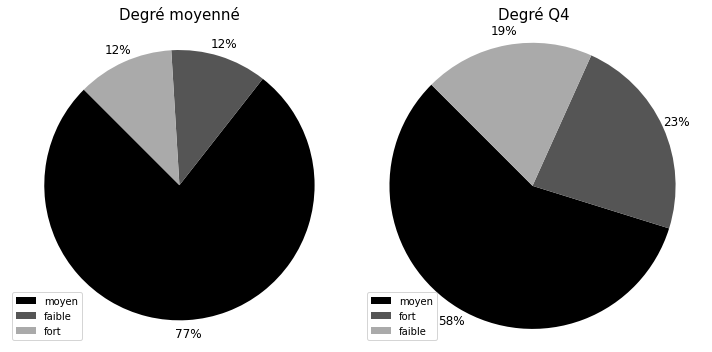

In [30]:
# déssiner le graphique, à réutiliser
liste = {"Degré moyenné":degre_m_count, "Degré Q4":degre_q4_count}
plt.figure(figsize=(10,5))
proptease = fm.FontProperties(size="large")
i = 1
for titre,count_df in liste.items():
    labels = count_df.index
    sizes = count_df.values

    plt.subplot(1,2,i)
    colors = cm.gray(np.arange(len(sizes))/len(sizes))

    patches, texts, autotexts = plt.pie(sizes, autopct='%1.0f%%',
                                        shadow=False, startangle=135, colors=colors,
                                       labeldistance=1.15, pctdistance=1.1)
    plt.axis('equal')


    plt.setp(autotexts, fontproperties=proptease)  # autotexts 是里面的百分数
    plt.setp(texts, fontproperties=proptease)  #label

    plt.legend(patches, labels, loc=3)
    plt.title(titre, loc="center", fontdict={'size':15})
    plt.tight_layout()
    
    i += 1

plt.show()

In [61]:
# concaténer les vrais et les faux
mwe_degre_df = pd.concat([vrai_df,faux_df],ignore_index=True)
mwe_degre_df

,sous-corpus,Expression,forme canonique,Q1avg,Q2avg,Q3avg,Moyenne 1-2 (3),Q4avg,Moyenne,Degré,Q1std,Q2std,Q4std,Q1cv,Q2cv,Q4cv,Q4degre
0,ESLO_ANCOR,prendre position,prendre position,1.850000,3.750000,#DIV/0!,2.800000,2.925000,2.862500,moyen,0.35,0.83,0.553963,0.189189,0.221108,0.189389,moyen
1,ESLO_ANCOR,avoir rôle,avoir rôle,1.875000,4.500000,#DIV/0!,3.187500,3.950000,3.568750,moyen,0.75,0.87,0.782624,0.399778,0.192450,0.198133,moyen
2,ESLO_ANCOR,avoir idée,avoir idée,2.225000,5.000000,#DIV/0!,3.612500,3.950000,3.781250,moyen,1.28,0.00,0.782624,0.576767,0.000000,0.198133,moyen
3,ESLO_ANCOR,produire résultat,produire résultat,3.075000,4.500000,#DIV/0!,3.787500,4.125000,3.956250,moyen,1.04,0.87,0.762807,0.336687,0.192450,0.184923,fort
4,ESLO_ANCOR,exercer contrôle,exercer contrôle,2.900000,4.500000,#DIV/0!,3.700000,3.975000,3.837500,moyen,0.99,0.87,0.872855,0.341362,0.192450,0.219586,moyen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Sequoia,prendre en otage,prendre en otage,3.133333,4.333333,#DIV/0!,3.733333,3.566667,3.650000,moyen,0.33,0.94,0.601849,0.105314,0.217571,0.168743,moyen
115,Sequoia,succès rencontrer,rencontrer succès,2.333333,4.666667,#DIV/0!,3.500000,3.633333,3.566667,moyen,0.91,0.47,0.286744,0.390186,0.101015,0.078920,moyen
116,Sequoia,traiter par le mépris,traiter par le mépris,4.300000,2.333333,#DIV/0!,3.316667,3.000000,3.158333,moyen,0.57,0.47,0.989949,0.132918,0.202031,0.329983,moyen
117,Sequoia,avoir occasion,avoir occasion,2.466667,5.000000,#DIV/0!,3.733333,3.500000,3.616667,moyen,1.40,0.00,0.588784,0.567889,0.000000,0.168224,moyen


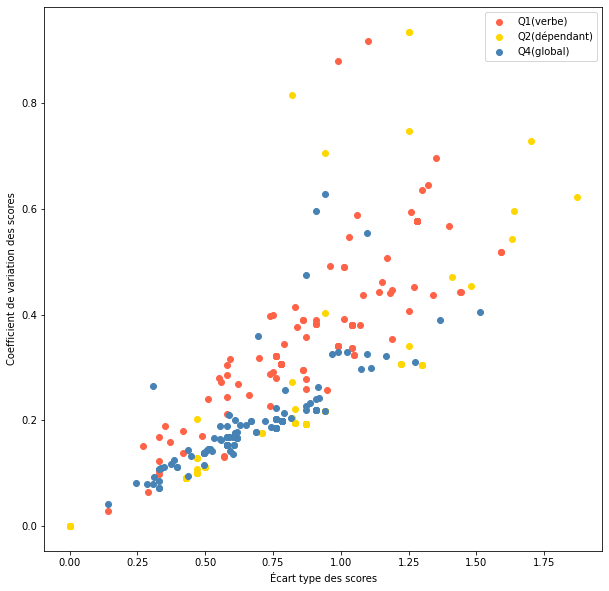

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(mwe_degre_df.Q1std,mwe_degre_df.Q1cv, c="tomato", label="Q1(verbe)")
plt.scatter(mwe_degre_df.Q2std, mwe_degre_df.Q2cv, c="gold", label="Q2(dépendant)")
plt.scatter(mwe_degre_df.Q4std,mwe_degre_df.Q4cv, c="steelblue", label="Q4(global)")
plt.legend()
plt.xlabel("Écart type des scores")
plt.ylabel("Coefficient de variation des scores")
plt.show()

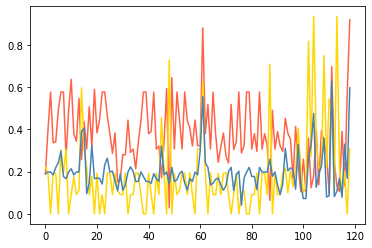

In [62]:
plt.plot(mwe_degre_df.Q1cv, color = "tomato") #verb
plt.plot(mwe_degre_df.Q2cv, color = "gold")   #dependant
plt.plot(mwe_degre_df.Q4cv, color="steelblue") # global
plt.show()

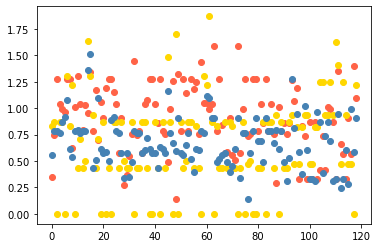

In [68]:
x = np.arange(len(mwe_degre_df))
plt.scatter(x,mwe_degre_df.Q1std, c="tomato")
plt.scatter(x,mwe_degre_df.Q2std, c="gold")
plt.scatter(x,mwe_degre_df.Q4std, c="steelblue")
plt.show()

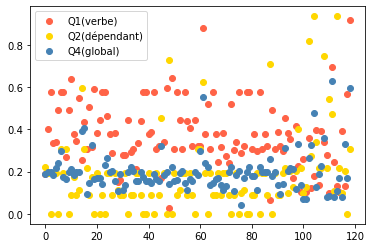

In [71]:
plt.scatter(x,mwe_degre_df.Q1cv, c="tomato", label="Q1(verbe)")
plt.scatter(x,mwe_degre_df.Q2cv, c="gold", label="Q2(dépendant)")
plt.scatter(x,mwe_degre_df.Q4cv, c="steelblue", label="Q4(global)")
plt.legend()
plt.show()

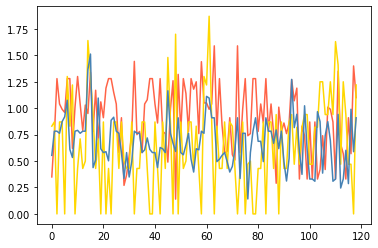

In [63]:
plt.plot(mwe_degre_df.Q1std, color = "tomato")
plt.plot(mwe_degre_df.Q2std, color = "gold")
plt.plot(mwe_degre_df.Q4std, color="steelblue")
plt.show()

In [ ]:
liste = glob.glob("resultats_mwes/*_croisement_mwe.json")

In [45]:
chemin_mwe_fic = ["resultats_mwes/fauxcas_mwe.json", ""
mwe_df = pd.DataFrame()

with open(chemin_mwe_fic, "r", encoding="utf8") as chemin_mwe_fic:
    dico_mwe = json.load(chemin_mwe_fic)
mwe_df = pd.DataFrame(dico_mwe)
mwe_df.columns = ["mwe","mwe_dico"]
#     for mwe in dico_mwe:
#         dftmp = pd.DataFrame(dico_mwe[mwe])
#         mwe_df = pd.concat([mwe_df, dftmp], ignore_index = True)
mwe_df

,mwe,mwe_dico
0,il falloir,"{'expr_cnt': {'il': 1, 'falloir': 1}, 'type': ..."
1,il y avoir,"{'expr_cnt': {'il': 1, 'y': 1, 'avoir': 1}, 't..."
2,il se agir,"{'expr_cnt': {'il': 1, 'se': 1, 'agir': 1}, 't..."
3,mettre en examen,"{'expr_cnt': {'mettre': 1, 'en': 1, 'examen': ..."
4,se produire,"{'expr_cnt': {'se': 1, 'produire': 1}, 'type':..."
...,...,...
467,montrer de le doigt,"{'expr_cnt': {'montrer': 1, 'de': 1, 'le': 1, ..."
468,mise en évidence,"{'expr_cnt': {'mise': 1, 'en': 1, 'évidence': ..."
469,subir modification,"{'expr_cnt': {'subir': 1, 'modification': 1}, ..."
470,susciter intérêt,"{'expr_cnt': {'susciter': 1, 'intérêt': 1}, 't..."


In [40]:
# def extract_type(dico):
#     return dico["type"]
# mwe_df["type"] = mwe_df[1].map(extract_type)

In [47]:
mwe_df["type"] = mwe_df["mwe_dico"].apply(lambda x: x["type"])
mwe_df["nbre_occ"] = mwe_df["mwe_dico"].apply(lambda x: x["nbre_occurrence"])
mwe_df

,mwe,mwe_dico,type,nbre_occ
0,il falloir,"{'expr_cnt': {'il': 1, 'falloir': 1}, 'type': ...",VID,37
1,il y avoir,"{'expr_cnt': {'il': 1, 'y': 1, 'avoir': 1}, 't...",VID,24
2,il se agir,"{'expr_cnt': {'il': 1, 'se': 1, 'agir': 1}, 't...",VID,19
3,mettre en examen,"{'expr_cnt': {'mettre': 1, 'en': 1, 'examen': ...",VID,18
4,se produire,"{'expr_cnt': {'se': 1, 'produire': 1}, 'type':...",IRV,14
...,...,...,...,...
467,montrer de le doigt,"{'expr_cnt': {'montrer': 1, 'de': 1, 'le': 1, ...",VID,1
468,mise en évidence,"{'expr_cnt': {'mise': 1, 'en': 1, 'évidence': ...",VID,1
469,subir modification,"{'expr_cnt': {'subir': 1, 'modification': 1}, ...",LVC.full,1
470,susciter intérêt,"{'expr_cnt': {'susciter': 1, 'intérêt': 1}, 't...",LVC.full,1
